<h1>Name : Pratyush Balivada</h1>

<h3> Task 2 - Prediction using Unsupervised ML</h3>

<h3> Task Description : </h3>

<h5>From the given Iris Dataset, predict the optimum number of clusters and represent it visually. </h5>

<h2>Importing Libraries and packages </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h2>Visualizing the feature data</h2>

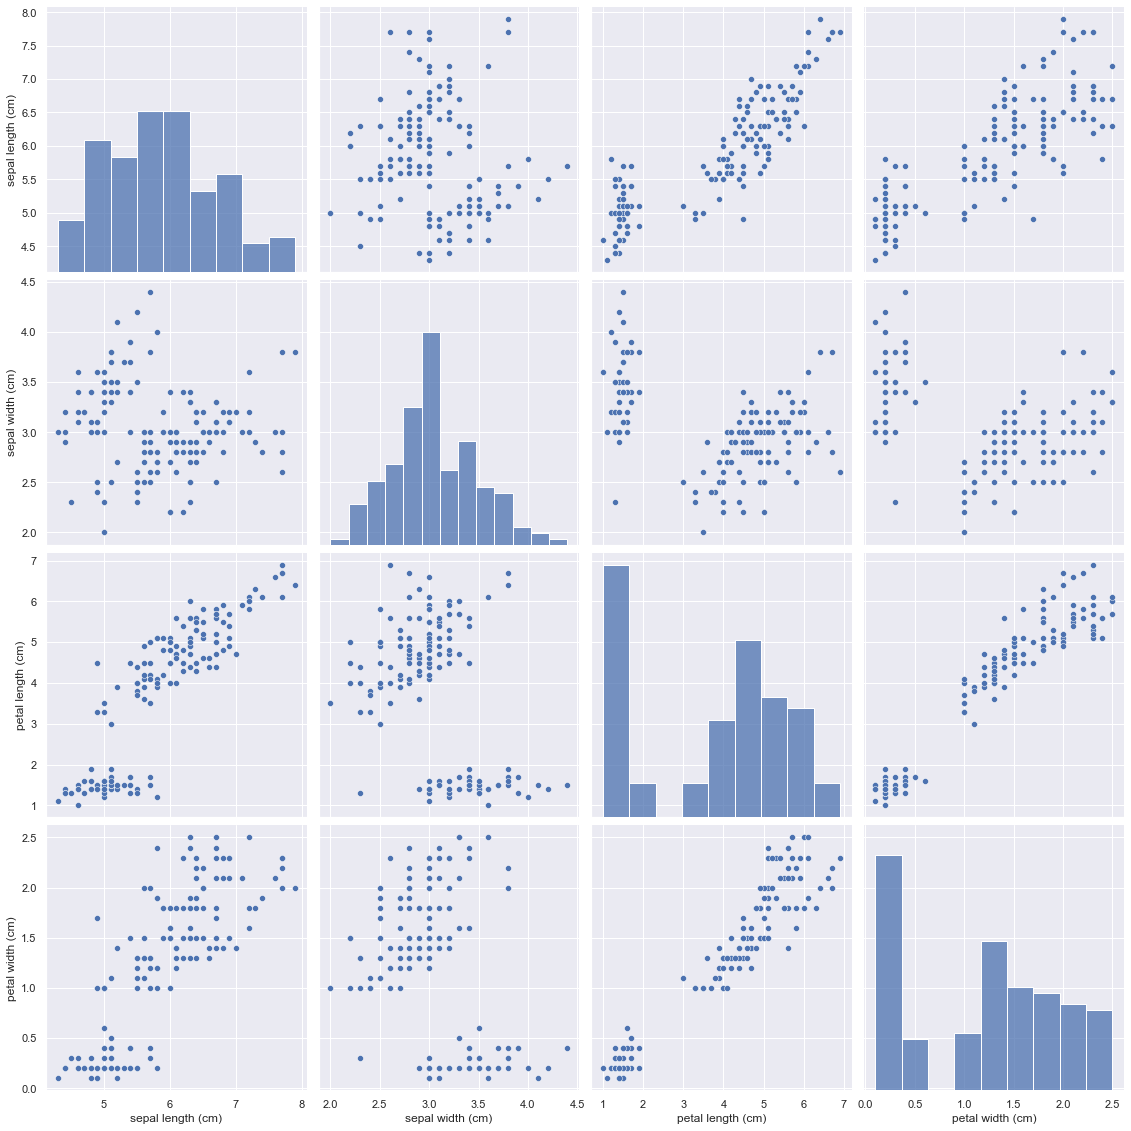

In [6]:
import seaborn as sns

sns.set()

sns.pairplot(df,height=4)

<AxesSubplot:>

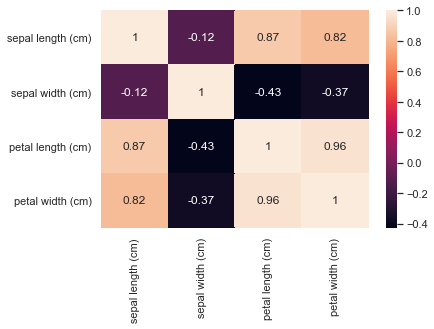

In [7]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix,annot=True)

<h2>Finding optimum K value using Elbow method</h2>

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


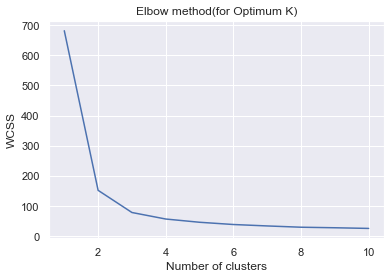

In [8]:
x = df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,init = 'k-means++',max_iter = 400, n_init = 10, random_state = 0)
    model.fit(x)
    wcss.append(model.inertia_)
    

# Elbow method to find out optimum k value

plt.plot(range(1,11), wcss)
plt.title('Elbow method(for Optimum K)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<h2> K means clustering , predicting clusters for data points and visualizing them</h2>

In [9]:
model = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 400, n_init = 10, random_state = 0)
model_pred = model.fit_predict(x)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


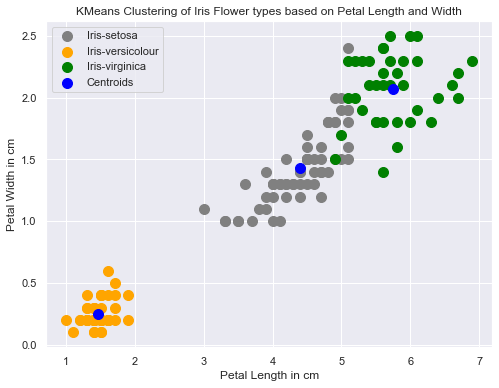

In [10]:
print(model.labels_)
plt.figure(figsize=(8, 6))
plt.scatter(x[model_pred  == 0, 2], x[model_pred == 0, 3], s = 100, c = 'Grey', label = 'Iris-setosa')
plt.scatter(x[model_pred  == 1, 2], x[model_pred == 1, 3], s = 100, c = 'Orange', label = 'Iris-versicolour')
plt.scatter(x[model_pred  == 2, 2], x[model_pred  == 2, 3],s = 100, c = 'Green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], s = 100, c = 'Blue', label = 'Centroids')
plt.xlabel("Petal Length in cm")
plt.ylabel("Petal Width in cm")
plt.title("KMeans Clustering of Iris Flower types based on Petal Length and Width")
plt.legend()
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


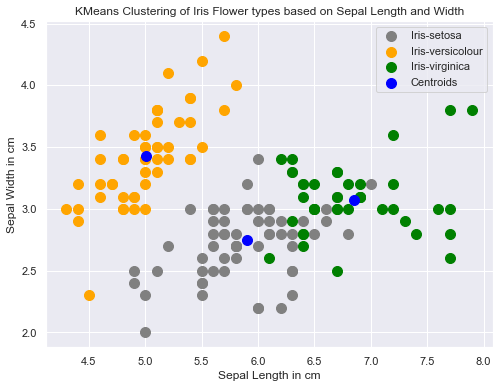

In [11]:
print(model.labels_)
plt.figure(figsize=(8, 6))
plt.scatter(x[model_pred  == 0, 0], x[model_pred == 0, 1], s = 100, c = 'Grey', label = 'Iris-setosa')
plt.scatter(x[model_pred  == 1, 0], x[model_pred == 1, 1], s = 100, c = 'Orange', label = 'Iris-versicolour')
plt.scatter(x[model_pred  == 2, 0], x[model_pred  == 2, 1],s = 100, c = 'Green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'Blue', label = 'Centroids')
plt.xlabel("Sepal Length in cm")
plt.ylabel("Sepal Width in cm")
plt.title("KMeans Clustering of Iris Flower types based on Sepal Length and Width")
plt.legend()
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


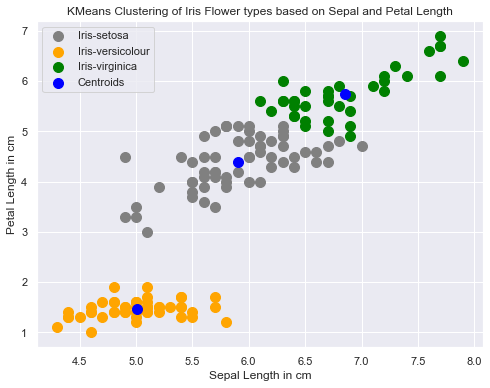

In [12]:
print(model.labels_)
plt.figure(figsize=(8, 6))
plt.scatter(x[model_pred  == 0, 0], x[model_pred == 0, 2], s = 100, c = 'Grey', label = 'Iris-setosa')
plt.scatter(x[model_pred  == 1, 0], x[model_pred == 1, 2], s = 100, c = 'Orange', label = 'Iris-versicolour')
plt.scatter(x[model_pred  == 2, 0], x[model_pred  == 2, 2],s = 100, c = 'Green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,2], s = 100, c = 'Blue', label = 'Centroids')
plt.xlabel("Sepal Length in cm")
plt.ylabel("Petal Length in cm")
plt.title("KMeans Clustering of Iris Flower types based on Sepal and Petal Length")
plt.legend()
plt.show()

<h4>From this experiment we have found out the optimum k value which is '3' by elbow method and clustered the data using kmeans on the basis of petal length and width, sepal length and width, sepal length and petal length. We can find clusters for other variable combinations too. We used pairplot from seaborn to observe the variations between the features and plotted a heatmap for the correlation of the data.Using unsupervised learning we predicted the optimum number of clusters and visualized them.Thank You!</h4>